# Publication figures for competition use case - CITE-seq data
Stripplots

In [1]:
# Imports
import os
import anndata as ad
import numpy as np
import pandas as pd
import scib
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import matplotlib.font_manager as fm

During startup - Warning messages:
1: Setting LC_CTYPE failed, using "C" 
2: Setting LC_COLLATE failed, using "C" 
3: Setting LC_TIME failed, using "C" 
4: Setting LC_MESSAGES failed, using "C" 
5: Setting LC_MONETARY failed, using "C" 
6: Setting LC_PAPER failed, using "C" 
7: Setting LC_MEASUREMENT failed, using "C" 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
scib.__version__

'1.0.1'

In [4]:
plt.style.use('seaborn-colorblind')
plt.rcParams['font.size'] = '12'

In [5]:
# Need to remove chached fonts

In [6]:
! rm ~/.cache/matplotlib -rf

In [7]:
font_dirs = ["/home/prauten/miniconda3/envs/scib_v1.0.1_min/fonts"]  # The path to the custom font file.
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [8]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [9]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

In [10]:
plt.rcParams['figure.figsize'] = [6.0*4/5, 4.0*4/5]

# CITE-seq
All these models no cap on epochs!

- CVAE 5 seeds (sample)
- BAVAE 5 seeds (sample)
- BAVAE 1 seed (site)
- BAVAE concat 5 seeds (sample)
- BAVAE rna only 5 seeds (sample) (20 dims)
- BAVAE adt only 5 seeds (sample) (20 dims)
- totalVI 16 dims  5 seeds (sample) 
- Winner 5 seeds (sample)


In [11]:
# CITE-seq

In [12]:
scores = pd.read_csv("./../Evaluation/scores/CITE/batch_removal_scores_all_models.csv", index_col=0)

In [13]:
scores.rename(index={"asw_batch": "asw_batch_sample", "asw_site": "asw_batch_site", "iLISI_batch": "iLISI_sample"}, inplace=True)

In [14]:
scores.rename(index={"ti_cons_batch_mean": "ti_cons"}, inplace=True)

<AxesSubplot:>

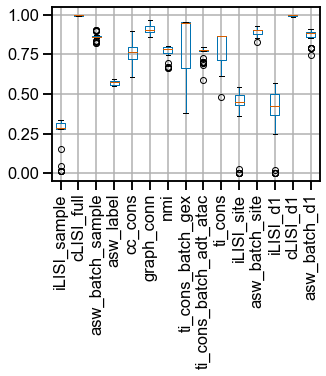

In [15]:
scores.drop("dims").T.boxplot(rot=90)

In [16]:
scores.shape

(16, 37)

In [17]:
scores = scores.T

In [18]:
scores['Model'] = scores.index.map(lambda x: 'totalVI' if 'totalVI' in x else
                               'GD' if 'Winner' in x else
                               'Liam site' if 'site' in x else 
                               'Liam rna only' if 'rna' in x else 
                               'Liam adt only' if 'adt' in x else
                               'Liam concat' if 'concat' in x else 
                               'Liam CVAE' if 'CVAE' in x else 
                               'Liam' if 'BAVAE' in x else 
                               'Liam VAE')

In [19]:
scores['Model'].value_counts()

Liam             5
Liam CVAE        5
Liam concat      5
totalVI          5
GD               5
Liam rna only    5
Liam adt only    5
Liam VAE         1
Liam site        1
Name: Model, dtype: int64

<Figure size 2880x1920 with 0 Axes>

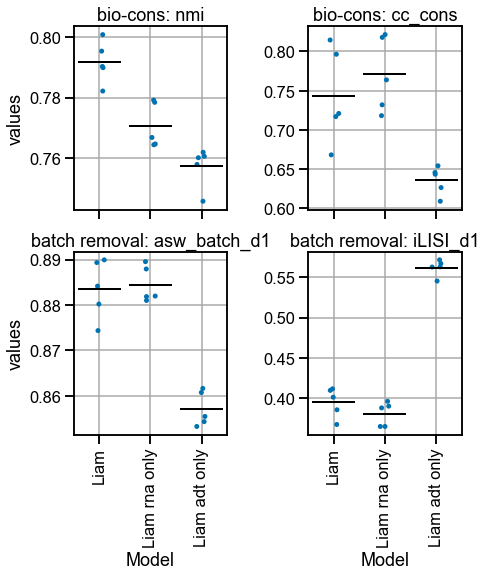

In [20]:
# Figure S4 d - stripplot
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']== 'Liam') |
                 (scores['Model']== 'Liam rna only') |
                 (scores['Model']== 'Liam adt only') 
                )]

# Enforce specific ordering
cat_type = CategoricalDtype(categories=['Liam', 'Liam rna only', 'Liam adt only'], ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)

# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'cc_cons', 'asw_batch_d1', 'iLISI_d1', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric', value_name='values', ignore_index=False)
subset_long['metric'] = subset_long['metric'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'Model': 'Model'}[x])


# Plotting
g = sns.FacetGrid(subset_long, col='metric', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=1)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_CITE_stripplot_baseline_single_mod.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()

<Figure size 2880x1920 with 0 Axes>

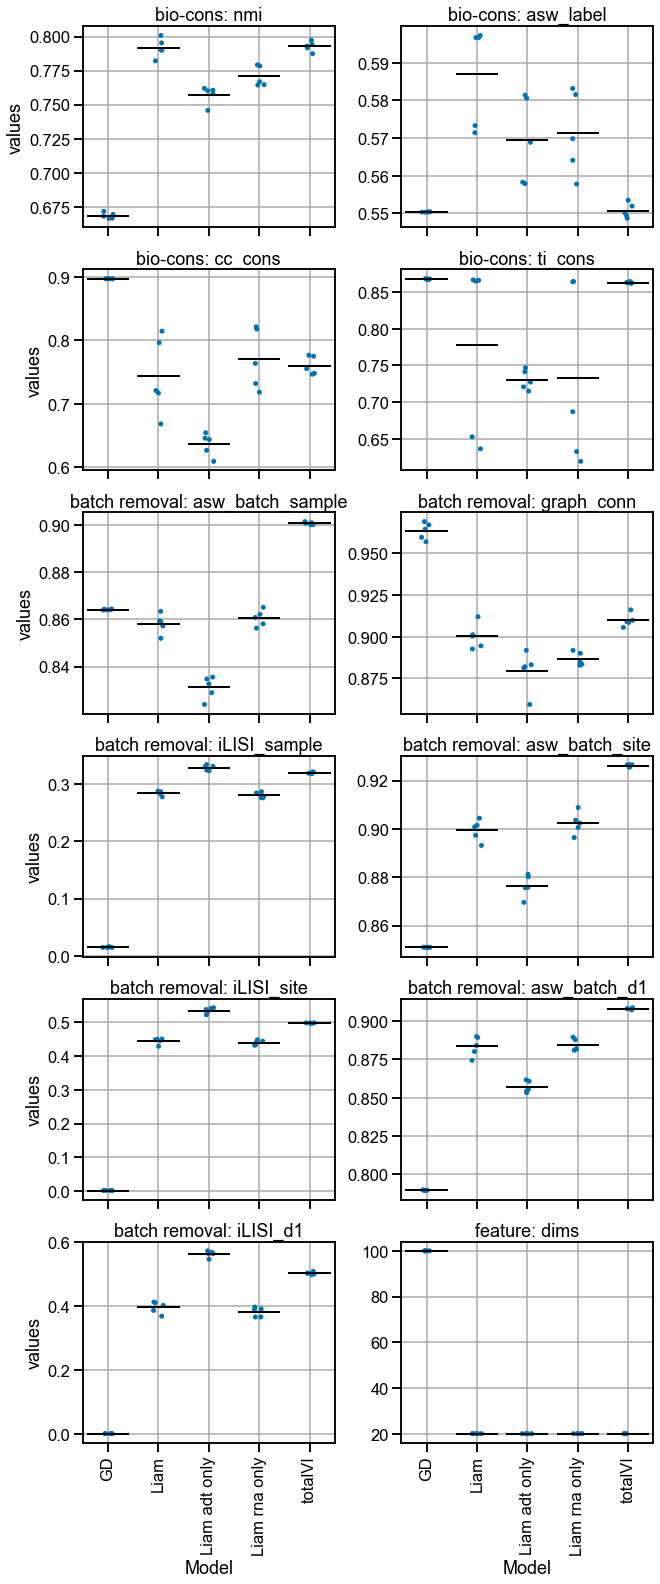

In [21]:
# Figure S7 alt2 - stripplot
fig = plt.figure(dpi=600)

subset = scores[((scores['Model']!= 'Liam site') & (scores['Model']!= 'Liam CVAE') & (scores['Model']!= 'Liam concat') & (scores['Model']!= 'Liam VAE'))].drop(['ti_cons_batch_gex', 'ti_cons_batch_adt_atac', 'cLISI_full'], axis=1)

# Enforce specific ordering
cat_type = CategoricalDtype(categories=sorted(subset['Model'].unique()), ordered=True)
subset['Model'] = subset['Model'].astype(cat_type)


# Inspired by best answer to this thread: https://stackoverflow.com/questions/40148830/different-ylim-for-shared-axes-in-pandas-boxplot


# Reformat for sns compatibility to long format
subset_long = subset[['nmi', 'asw_label', 'cc_cons', 'ti_cons', 'asw_batch_sample', 'graph_conn', 'iLISI_sample',
                                    'asw_batch_site', 'iLISI_site','asw_batch_d1', 'iLISI_d1', 'dims', 'Model']]
subset_long = pd.melt(subset_long, id_vars='Model', var_name='metric/feature', value_name='values', ignore_index=False)
subset_long['metric/feature'] = subset_long['metric/feature'].map(lambda x: {'asw_label': 'bio-cons: asw_label',\
                                                            'nmi': 'bio-cons: nmi',\
                                                            'cc_cons': 'bio-cons: cc_cons',\
                                                            'ti_cons': 'bio-cons: ti_cons',\
                                                            'asw_batch_sample': 'batch removal: asw_batch_sample',\
                                                            'graph_conn': 'batch removal: graph_conn',\
                                                            'iLISI_sample': 'batch removal: iLISI_sample',\
                                                            'asw_batch_site': 'batch removal: asw_batch_site',\
                                                            'iLISI_site': 'batch removal: iLISI_site',\
                                                            'asw_batch_d1': 'batch removal: asw_batch_d1',\
                                                            'iLISI_d1': 'batch removal: iLISI_d1',\
                                                            'dims': 'feature: dims',\
                                                            'Model': 'Model'}[x])


# Plotting
aspect = len(subset_long['Model'].unique())/3*0.8
g = sns.FacetGrid(subset_long, col='metric/feature', col_wrap=2, height=3.5, sharey=False, despine=False, aspect=aspect)
g.map(sns.stripplot, 'Model', 'values', jitter=True)#, hue='Model')
# https://stackoverflow.com/questions/67481900/how-to-add-a-mean-line-to-a-seaborn-stripplot-or-swarmplot
g.map(sns.boxplot, 'Model', 'values', showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            showfliers=False,
            showbox=False,
            showcaps=False)
g.map(plt.grid, color='darkgrey')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# https://github.com/mwaskom/seaborn/issues/867

g.set_titles(col_template='{col_name}')

plt.suptitle('')
fig.tight_layout()
plt.savefig('./figures/CU_base_CITE_stripplot_all.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()